In [29]:
import pandas as pd
import matplotlib.pyplot as plt

Cargando datos y visualización

Total samples: 100
   value
1     88
2     84
3     85
4     85
5     84


<Figure size 640x480 with 0 Axes>

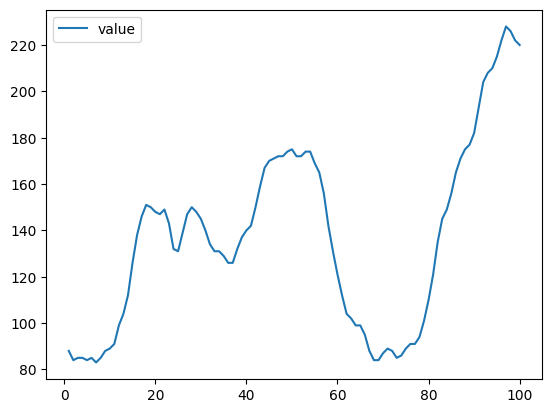

In [30]:
df = pd.read_csv('WWWusage.csv', names=['value'], header=0)
print(f"Total samples: {len(df)}")
print(df.head())

# Grafico
plt.figure(1)
df.plot()
plt.show()

Grafico de autocorrelación

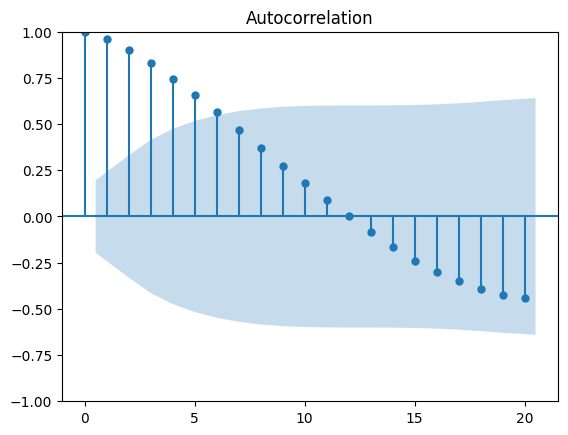

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.value);

Hacer estacionarios los datos

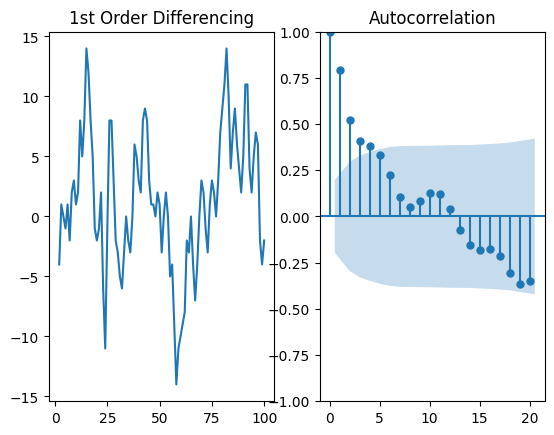

In [32]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df.value.diff())

ax2 = f.add_subplot(122)
plot_acf(df.value.diff().dropna(), ax=ax2)
plt.show()

Diferenciando dos veces "d" = 2

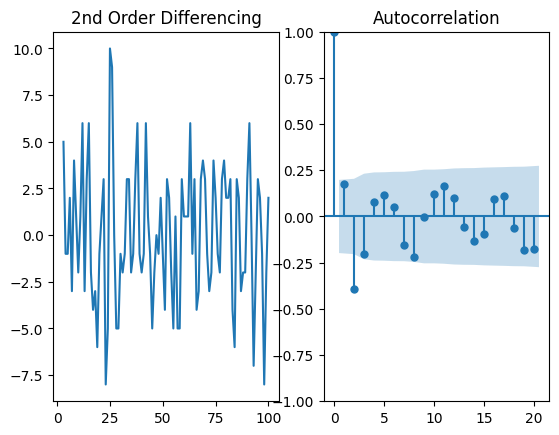

In [33]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(df.value.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(df.value.diff().diff().dropna(), ax=ax2)
plt.show()

Aplicando Augmented Dickey-Fuller test

In [34]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.value.dropna())
print('p-value: ', result[1])

result = adfuller(df.value.diff().dropna())
print('p-value: ', result[1])

result = adfuller(df.value.diff().diff().dropna())
print('p-value: ', result[1])

p-value:  0.12441935447109442
p-value:  0.07026846015272728
p-value:  2.8434287555470966e-17


Determinando el orden de la parte autoregresiva "p"

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


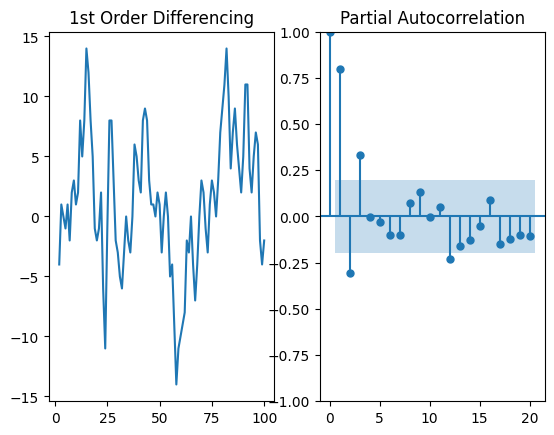

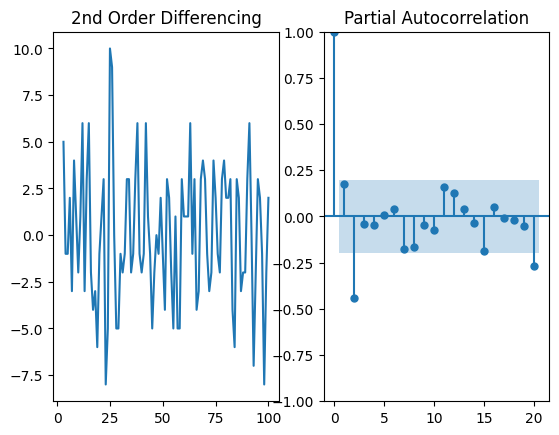

In [35]:
from statsmodels.graphics.tsaplots import plot_pacf

f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df.value.diff())

ax2 = f.add_subplot(122)
plot_pacf(df.value.diff().dropna(), ax=ax2)
plt.show()

f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(df.value.diff().diff())

ax2 = f.add_subplot(122)
plot_pacf(df.value.diff().diff().dropna(), ax=ax2)
plt.show()

Finalmente se determina que ARIMA(p=1,d=1,q=2)

In [44]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(df.value, order=(1,1,2))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -254.126
Date:                Fri, 26 Aug 2022   AIC                            516.253
Time:                        12:01:45   BIC                            526.633
Sample:                             0   HQIC                           520.453
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6976      0.130      5.365      0.000       0.443       0.952
ma.L1          0.4551      0.169      2.699      0.007       0.125       0.786
ma.L2         -0.0664      0.157     -0.424      0.6

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(p=1,d=2,q=2)

In [59]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(df.value, order=(1,2,2))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -252.594
Date:                Fri, 26 Aug 2022   AIC                            513.189
Time:                        12:12:28   BIC                            523.529
Sample:                             0   HQIC                           517.371
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6531      0.103      6.360      0.000       0.452       0.854
ma.L1         -0.4746      7.436     -0.064      0.949     -15.048      14.099
ma.L2         -0.5252      3.883     -0.135      0.8

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(p=1,d=1,q=3)

In [61]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(df.value, order=(1,1,3))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -252.289
Date:                Fri, 26 Aug 2022   AIC                            514.577
Time:                        12:12:51   BIC                            527.553
Sample:                             0   HQIC                           519.827
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8580      0.129      6.651      0.000       0.605       1.111
ma.L1          0.3429      0.174      1.971      0.049       0.002       0.684
ma.L2         -0.2852      0.197     -1.447      0.1

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Verificar el ajsute del modelo

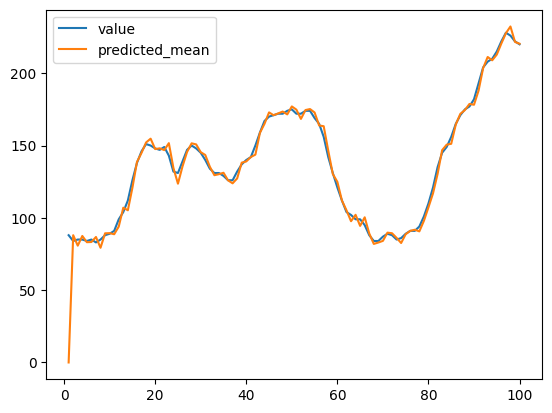

In [62]:
fig,ax = plt.subplots()
df.plot(ax=ax)
dfp = pd.DataFrame(model.predict()) 
dfp.plot(ax=ax)
plt.show()